<a href="https://colab.research.google.com/github/ptnv-s/IEEE_SBM_Machine_Learning_Techno_Colosseum_Task_1/blob/main/Loan_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df_train = pd.read_csv("/content/drive/MyDrive/data/Default_Fin.csv")

In [93]:
df_train

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


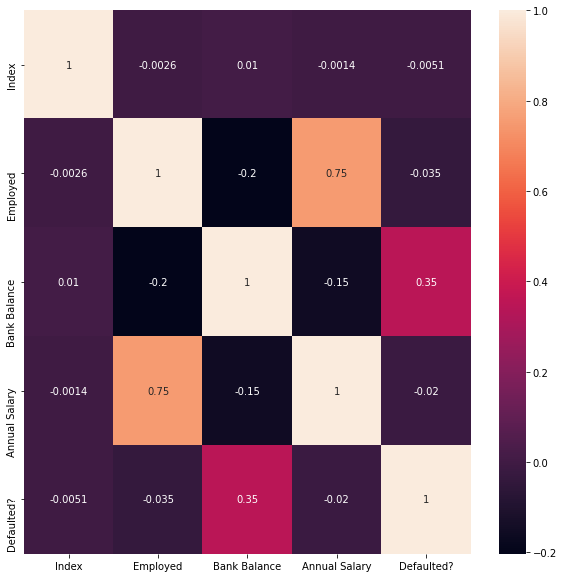

In [94]:
plt.figure(figsize = (10,10))       
sns.heatmap(df_train.corr(),annot = True)

In [60]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted?,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


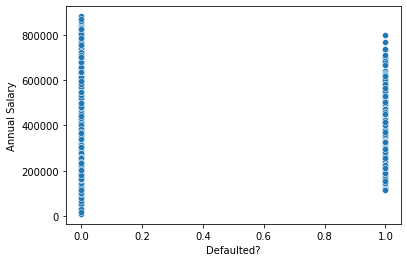

In [8]:
sns.scatterplot(data=df_train, x="Defaulted?", y="Annual Salary")

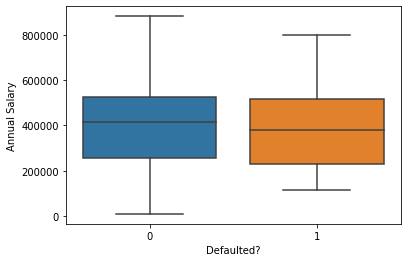

In [9]:
sns.boxplot(x = df_train["Defaulted?"], y = df_train["Annual Salary"]);

Thus we can conclude presence of outliers in Bank Balance


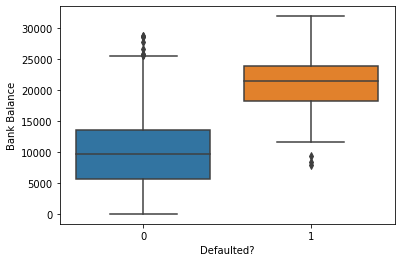

In [10]:
sns.boxplot(x = df_train["Defaulted?"],y = df_train["Bank Balance"]);

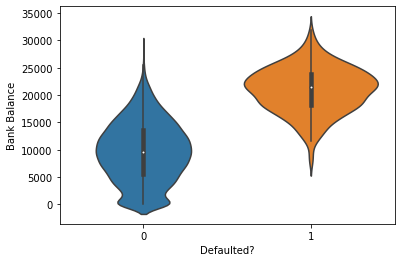

In [11]:
sns.violinplot(x = df_train["Defaulted?"],y = df_train["Bank Balance"]);

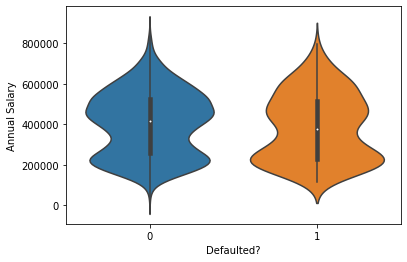

In [12]:
sns.violinplot(x = df_train["Defaulted?"],y = df_train["Annual Salary"]);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


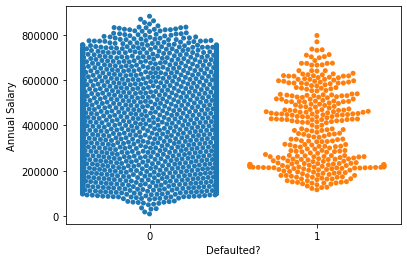

In [13]:
sns.swarmplot(data=df_train, x="Defaulted?", y="Annual Salary")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


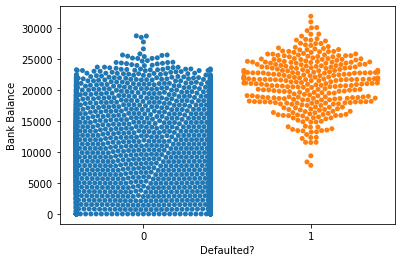

In [14]:
sns.swarmplot(data=df_train, x="Defaulted?", y="Bank Balance")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


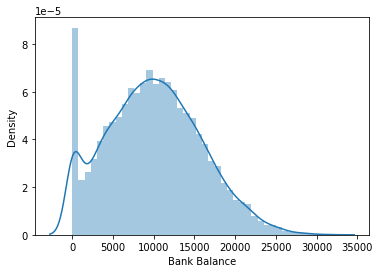

In [15]:
sns.distplot(df_train["Bank Balance"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


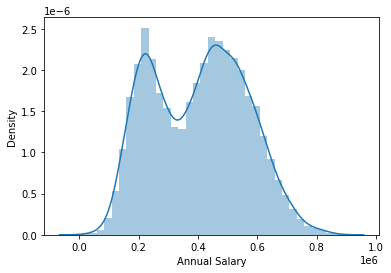

In [16]:
sns.distplot(df_train["Annual Salary"])

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
df_train[['Bank Balance','Annual Salary']]=MinMaxScaler().fit_transform(df_train[['Bank Balance','Annual Salary']])

In [97]:
df_train

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,0.274846,0.598905,0
1,2,0,0.307868,0.155727,0
2,3,1,0.404454,0.425862,0
3,4,1,0.199392,0.479959,0
4,5,1,0.295993,0.517867,0
...,...,...,...,...,...
9995,9996,1,0.268076,0.717488,0
9996,9997,1,0.285557,0.259524,0
9997,9998,1,0.318503,0.795032,0
9998,9999,1,0.591116,0.493213,0


In [98]:
y_train_def = df_train["Defaulted?"]

In [99]:
df_train1 = df_train

In [100]:
df_train.drop(['Defaulted?'],inplace=True,axis=1)

In [101]:
df_train.drop(['Index'],inplace=True,axis=1)

In [102]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train_def, test_size=0.25, random_state=42)

In [107]:
from sklearn import tree


In [108]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.968


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
param_dict = {
    "max_depth":range(2,6),
    "min_samples_split":range(2,6),
    "min_samples_leaf":range(6,15),
    "n_estimators":[50,100,150,200]
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(clf,
                    param_grid=param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 37.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using gridsearch parameter

In [109]:
clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
y_pred = clf.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test, y_pred)

0.9736

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False).fit(X_train,y_train)
clf.score(X_test,y_test)

0.9716

Using gridsearch parameter

In [ ]:
param_dict = {
    "max_depth":range(1,6),
    "learning_rate":[0.1,0.9,1.5],
    "min_samples_split":range(1,6),
    "min_samples_leaf":range(6,8),
    "n_estimators":[50,100,150,200]
}
grid = GridSearchCV(clf,
                    param_grid=param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1702 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 3210 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 4180 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 5308 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 53.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.5,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=150,
                                                  n_iter_no_...
                 

In [ ]:
grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Using gridsearch parameter

In [114]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9728

In [ ]:
param_dict = {
    "learning_rate":[0.05,0.1,0.5,0.9,1.5],
    "n_estimators":[50,100,150,200]
}
grid = GridSearchCV(clf,
                    param_grid=param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=0.1, n_estimators=100,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 0.9, 1.5],
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)

Trying other methods

In [115]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=100, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=2))             
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Extract score
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train_def, test_size=0.20, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.967

In [116]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=100, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=2))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(df_train, y_train_def, test_size=0.20, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.962

In [117]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
clf.score(X_test, y_test)

0.97

In [118]:
from sklearn.ensemble import IsolationForest

In [119]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=3, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [120]:
pred= iforest.fit_predict(df_train)
df_train1['scores']=iforest.decision_function(df_train)
df_train1['anomaly_label']=pred

In [121]:
df_train1[df_train1.anomaly_label==-1]

,Employed,Bank Balance,Annual Salary,scores,anomaly_label
5,0,0.346450,0.092325,-0.017289,-1
10,0,0.000000,0.289893,-0.002644,-1
61,1,0.260003,0.860938,-0.008533,-1
87,0,0.061202,0.171330,-0.002304,-1
104,1,0.551264,0.888759,-0.050296,-1
...,...,...,...,...,...
9873,1,0.900799,0.680536,-0.083466,-1
9878,1,0.294576,0.890954,-0.016542,-1
9893,1,0.862145,0.704452,-0.077318,-1
9912,1,0.809586,0.598195,-0.050927,-1


In [122]:
df_train1[df_train1.anomaly_label==1]

,Employed,Bank Balance,Annual Salary,scores,anomaly_label
0,1,0.274846,0.598905,0.168453,1
1,0,0.307868,0.155727,0.075616,1
2,1,0.404454,0.425862,0.148468,1
3,1,0.199392,0.479959,0.167564,1
4,1,0.295993,0.517867,0.180755,1
...,...,...,...,...,...
9995,1,0.268076,0.717488,0.130041,1
9996,1,0.285557,0.259524,0.080385,1
9997,1,0.318503,0.795032,0.059771,1
9998,1,0.591116,0.493213,0.078580,1


In [123]:
df_train1

,Employed,Bank Balance,Annual Salary,scores,anomaly_label
0,1,0.274846,0.598905,0.168453,1
1,0,0.307868,0.155727,0.075616,1
2,1,0.404454,0.425862,0.148468,1
3,1,0.199392,0.479959,0.167564,1
4,1,0.295993,0.517867,0.180755,1
...,...,...,...,...,...
9995,1,0.268076,0.717488,0.130041,1
9996,1,0.285557,0.259524,0.080385,1
9997,1,0.318503,0.795032,0.059771,1
9998,1,0.591116,0.493213,0.078580,1


This method can be used for detection of outliers


# **Thus we conclude Random Forest was best due to its handling of outliers, classification process and grid search for parameter selection.**